Herzlich Willkommen, liebe Datendetektivinnen.
Um die Daten besser zu verstehen, laden wir zuerst unseren Werzeugkoffer:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
print("Alle Werzeuge erfolgreich geladen")

Alle Werzeuge erfolgreich geladen


Jetzt laden wir die eigentlichen Daten aus einer Tabelle. Dies sind die Daten mit fehlenden/falschen Angaben.

In [2]:
file = "GirlsDay_Beispiel_Windanlagen_v4_missing.csv"
daten = pd.read_csv(file)
#Wir zaehlen, wie viele Daten wir je Katgorie haben.
daten.count()

ID                    30
AnzahlFluegel         26
Baujahr               25
Name                  26
Leistung              26
Untergrund            27
Hoehe                 30
Durchmesser           27
LeistungProFlaeche    27
dtype: int64

In [3]:
#Wir lassens uns die ersten 10 Eintraege in der Tabelle anzeigen
daten.head(10)
#NaN steht fuer #Not a Number", also "keine Zahl". So sagt der Computer, dass er diese Eingabe nicht versteht.

,ID,AnzahlFluegel,Baujahr,Name,Leistung,Untergrund,Hoehe,Durchmesser,LeistungProFlaeche
0,1,3.0,2020.0,MaxWind-4MW,4.0,Land,105,137.0,271.0
1,2,NaN,2020.0,WindPower-1MW,1.0,Land,107,119.0,90.0
2,3,3.0,2020.0,SuperWind-2MW,2.0,Wasser,110,NaN,167.0
3,4,3.0,2020.0,MaxWind-4MW,NaN,Land,112,121.0,349.0
4,5,3.0,2020.0,WindPower-1MW,1.0,NaN,-113,110.0,105.0
5,6,3.0,2020.0,NaN,1.0,Land,114,90.0,157.0
6,7,3.0,2020.0,MaxWind-4MW,4.0,Land,117,145.0,NaN
7,8,3.0,2020.0,NaN,4.0,Land,118,121.0,347.0
8,9,3.0,2020.0,MaxWind-4MW,4.0,Land,0,133.0,287.0
9,10,3.0,2020.0,WindPower-1MW,1.0,Land,120,110.0,105.0


In [4]:
#Uebersicht ueber die Daten. Was bedeuten min & max?
daten.describe()

,ID,AnzahlFluegel,Baujahr,Leistung,Hoehe,Durchmesser,LeistungProFlaeche
count,30.000000,26.0,25.000000,26.000000,30.000000,27.000000,27.000000
mean,15.500000,3.0,2021.000000,2.153846,95.733333,135.259259,156.925926
std,8.803408,0.0,0.912871,1.120439,109.077300,21.132535,90.275189
min,1.000000,3.0,2020.000000,1.000000,-187.000000,90.000000,54.000000
25%,8.250000,3.0,2020.000000,1.000000,107.750000,121.000000,93.500000
50%,15.500000,3.0,2021.000000,2.000000,126.000000,134.000000,126.000000
75%,22.750000,3.0,2022.000000,2.000000,170.500000,144.000000,170.500000
max,30.000000,3.0,2022.000000,4.000000,198.000000,191.000000,349.000000


In [5]:
#Die Funktion "sum()" summiert alle Eintraege. So koennen wir z.B. die Gesamtleistung bestimmen.
daten['Leistung'].sum()

56.0

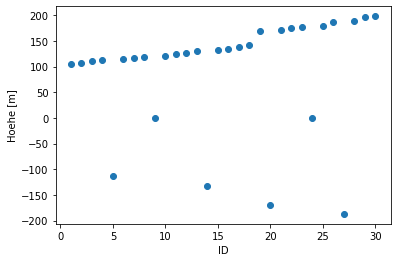

In [6]:
#Wir koennen Daten auch visuell darstellen. Dies hilft uns bei dem Verstandnis und beim weiteren ausfuellen.
plt.scatter(daten["ID"].values,daten["Hoehe"].values)
plt.xlabel("ID")
plt.ylabel("Hoehe [m]")
plt.show()
#Wir sehen dass die meisten Daten eng beisammen liegen und es 6 Ausreisser gibt.
#Die Daten die eng beisammen liegen scheinen aufsteigend: groessere ID bedeutet hoeher.
#Wir vermuten, dass die Daten der Hoehe nach sortiert sind.
#Hilft uns diese Information um die fehlenden Hoehen zu ergaenzen?

In [7]:
#Funktion die LeistungProFlaeche berechnet basierend auf Leistung und Durchmesser
def LeistungProFlaeche(Leistung_MW, Durchmesser):
    Flaeche = 3.14*(Durchmesser/2)**2
    Leistung_Watt = Leistung_MW*1000000
    return np.round(Leistung_Watt/Flaeche)

In [8]:
#Beispiel erste Zeile der Datentabelle
print(LeistungProFlaeche(Leistung_MW=4, Durchmesser=137))

271.0


In [9]:
#Beispiel ID=7
print(LeistungProFlaeche(Leistung_MW=4, Durchmesser=145))
#Du kannst die Werte aendern, um dir die fehlenden Daten zu berechnen

242.0


In [10]:
#Funktion um den Durchmesser zu berechnen, basierend auf Leistung und LeistungProFlaeche
def Durchmesser(Leistung_MW, Leistung_pro_flaeche):
    flaeche = 1000000*Leistung_MW/Leistung_pro_flaeche
    return np.round(2*np.sqrt(flaeche/np.pi))

In [11]:
#Beispiel zweite Zeile
print(Durchmesser(Leistung_MW=1, Leistung_pro_flaeche=90))

119.0


In [12]:
#Beispiel ID=3
print(Durchmesser(Leistung_MW=2, Leistung_pro_flaeche=167))
#Du kannst die Werte aendern, um dir die fehlenden Daten zu berechnen

123.0


In [13]:
### GRUPPIEREN DER DATEN ###

In [14]:
#Wir laden nun die korrigierten Daten
file = "GirlsDay_Beispiel_Windanlagen_v4_complete.csv"
daten = pd.read_csv(file)

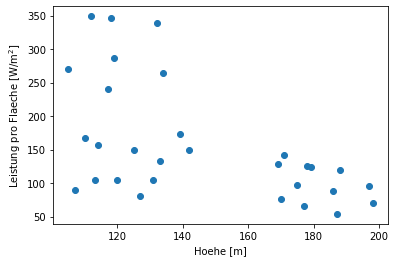

In [15]:
#Wir stellen die Daten visuell dar
plt.scatter(daten["Hoehe"].values,daten["LeistungProFlaeche"].values)
plt.xlabel("Hoehe [m]")
plt.ylabel("Leistung pro Flaeche [W/m$^2$]")
plt.show()
#Frage: Wie wuerdet ihr clustern? Wie viele Gruppen wuerdet ihr empfehlen?

In [16]:
#Jetzt nutzen wir Kuenstliche Intelligenz um die Daten zu clustern
std1 = daten["Hoehe"].std()
std2 = daten["LeistungProFlaeche"].std()
print(std1,std2)
#Divide data by standard deviation to scale clusters
daten["Hoehe"] /= std1
daten["LeistungProFlaeche"] /= std2

31.289177740524934 87.77898709094703


Anzahl Gruppen: 2


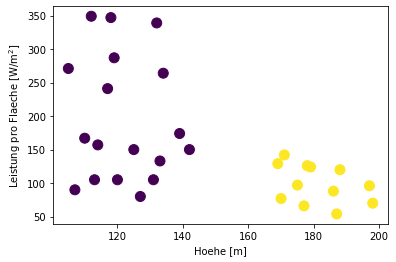

Anzahl Gruppen: 3


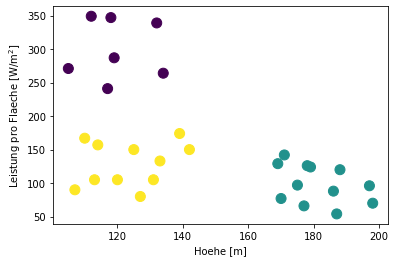

Anzahl Gruppen: 4


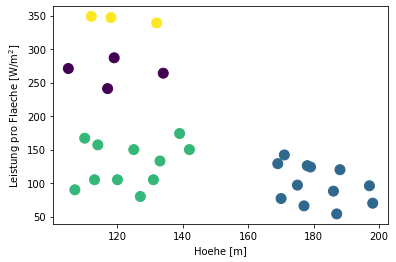

Anzahl Gruppen: 5


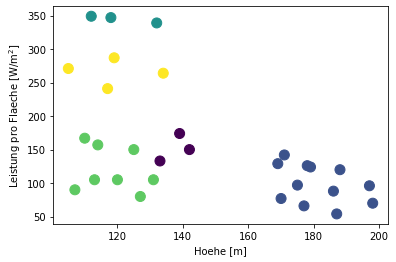

In [17]:
# K-means Clustering
#Was ist die optimale Anzahl an Gruppen?
#Wir probieren verschiedene Anzahlen aus:
for Nclusters in [2,3,4,5]:
    print("Anzahl Gruppen:",Nclusters)
    kmeans = KMeans(n_clusters=Nclusters).fit(daten[['Hoehe','LeistungProFlaeche']])
    centroids = kmeans.cluster_centers_
#    print(centroids)

    plt.scatter(daten["Hoehe"]*std1, daten["LeistungProFlaeche"]*std2, c=kmeans.labels_.astype(float), s=100, alpha=1.0)
#    plt.scatter(centroids[:, 0]*mean2, centroids[:, 1]*mean1, c='red', s=50)
    plt.xlabel("Hoehe [m]")
    plt.ylabel("Leistung pro Flaeche [W/m$^2$]")
    plt.show()

Robert Habeck will kleine Windrkraftanlagen (geringe Hoehe) mit hoher Leistung pro Flaeche. Welche Gruppe wuerdet ihr ihm dazu empfehlen? Wenn ihr die Gruppe identifiziert habt, koennt ihr in der Tabelle schauen, ob diese Anlagen etwas gemeinsam haben.